# Sampling data

The script creates a dataset of EPC certificates for England, applies some initial cleaning steps and splits the data into a train and test set

In [1]:
import numpy as np
import pandas as pd
import os
import json
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
# set variables from config file
config_path = os.path.abspath('..')

with open(config_path + '/config-example.json', 'r') as f:
    config = json.load(f)

epc_output_fname = config['DEFAULT']['epc_output_fname']
processing_path = config['DEFAULT']['processing_path']
epc_england_fname = config['DEFAULT']['epc_england_fname']
epc_fname_suffix = config['DEFAULT']['epc_fname_suffix']
epc_train_fname = config['DEFAULT']['epc_train_fname']
epc_test_fname = config['DEFAULT']['epc_test_fname']

In [3]:
#Specify the import dictionary for the dates
dtype_dict = {'INSPECTION_DATE':'str','LODGEMENT_DATE':'str','ADDRESS1':'str','ADDRESS2':'str','LOCAL_AUTHORITY':'str','CONSTITUENCY':'str',
                'MAINS_GAS_FLAG':'str','FLAT_STOREY_COUNT':'str','FLOOR_ENERGY_EFF':'str','ADDRESS':'str','UPRN_SOURCE':'str'}

#TODO consider specifying dtype for columns 2, 3, 14, 15, 34, 37, 51, 82, 92
epc_england_District_Councils = pd.read_csv(os.path.join(processing_path,epc_output_fname) + epc_fname_suffix,header = 0, 
                       delimiter = ',', dtype = dtype_dict,parse_dates = ['INSPECTION_DATE','LODGEMENT_DATE'])

C:\Users\KingRemy\AppData\Local\Temp\ipykernel_19344\3239976203.py:6: DtypeWarning: Columns (15,37) have mixed types. Specify dtype option on import or set low_memory=False.
  epc_england_District_Councils = pd.read_csv(os.path.join(processing_path,epc_output_fname) + epc_fname_suffix,header = 0,


In [5]:
epc_england_District_Councils.head()

,LMK_KEY,ADDRESS1,ADDRESS2,ADDRESS3,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,...,CONSTITUENCY_LABEL,POSTTOWN,CONSTRUCTION_AGE_BAND,LODGEMENT_DATETIME,TENURE,FIXED_LIGHTING_OUTLETS_COUNT,LOW_ENERGY_FIXED_LIGHT_COUNT,UPRN,UPRN_SOURCE,region
0,0001d5de25f8680899ef56d2df1c82efacc81f9e520452...,14 Weald Dyke,NaN,NaN,BN43 5LP,10003066909,C,B,70,83,...,East Worthing and Shoreham,SHOREHAM-BY-SEA,England and Wales: 1967-1975,2022-08-11 14:38:29,Rented (private),11.0,NaN,60018024.0,Energy Assessor,Adur
1,000c4330f49ae122e2de7e95b14a06c6e027677b7b86a6...,"39, West Way",NaN,NaN,BN15 8LX,10000300382,D,B,60,85,...,East Worthing and Shoreham,Lancing,England and Wales: 1930-1949,2020-10-14,Owner-occupied,13.0,11.0,60008661.0,Address Matched,Adur
2,001e1d17b63f673332aaffc50ce55ba62aed15cb330424...,7 Greenoaks,NaN,NaN,BN15 0HN,10002369523,D,B,62,85,...,East Worthing and Shoreham,LANCING,England and Wales: 1950-1966,2022-03-04 14:52:39,Owner-occupied,7.0,NaN,60003678.0,Energy Assessor,Adur
3,0060a9df827bca90eb83a3aff2f75ac7c49d5cbec80d18...,17 SOUTHVIEW ROAD,SOUTHWICK,NaN,BN42 4TW,10000963203,D,C,64,78,...,East Worthing and Shoreham,SOUTHWICK,England and Wales: 1900-1929,2021-05-04 10:16:24,Owner-occupied,5.0,NaN,60026065.0,Energy Assessor,Adur
4,00721a91565fc9da864541e2a26d0c5809c9fcd1cd9421...,28 Riverside Road,NaN,NaN,BN43 5RB,10003214358,E,C,52,78,...,East Worthing and Shoreham,SHOREHAM-BY-SEA,England and Wales: 1950-1966,2022-08-01 12:21:38,Owner-occupied,11.0,NaN,60015728.0,Energy Assessor,Adur


In [15]:
epc_england_District_Councils.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377590 entries, 0 to 8377589
Data columns (total 93 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   LMK_KEY                        object        
 1   ADDRESS1                       object        
 2   ADDRESS2                       object        
 3   ADDRESS3                       object        
 4   POSTCODE                       object        
 5   BUILDING_REFERENCE_NUMBER      int64         
 6   CURRENT_ENERGY_RATING          object        
 7   POTENTIAL_ENERGY_RATING        object        
 8   CURRENT_ENERGY_EFFICIENCY      int64         
 9   POTENTIAL_ENERGY_EFFICIENCY    int64         
 10  PROPERTY_TYPE                  object        
 11  BUILT_FORM                     object        
 12  INSPECTION_DATE                datetime64[ns]
 13  LOCAL_AUTHORITY                object        
 14  CONSTITUENCY                   object        
 15  COUNTY         

In [16]:
var_list = ['LMK_KEY','region','POSTCODE','BUILDING_REFERENCE_NUMBER','CURRENT_ENERGY_RATING',
            'CURRENT_ENERGY_EFFICIENCY','PROPERTY_TYPE','BUILT_FORM','INSPECTION_DATE','LODGEMENT_DATE',
            'COUNTY','TRANSACTION_TYPE',
            'ENERGY_CONSUMPTION_CURRENT','CO2_EMISSIONS_CURRENT','CO2_EMISS_CURR_PER_FLOOR_AREA',
            'LIGHTING_COST_CURRENT','HEATING_COST_CURRENT','HOT_WATER_COST_CURRENT','TOTAL_FLOOR_AREA',
            'ENERGY_TARIFF','MAINS_GAS_FLAG','FLOOR_LEVEL','FLAT_TOP_STOREY','FLAT_STOREY_COUNT',
            'MAIN_HEATING_CONTROLS','MULTI_GLAZE_PROPORTION','GLAZED_TYPE','EXTENSION_COUNT','NUMBER_HABITABLE_ROOMS',
            'NUMBER_HEATED_ROOMS','LOW_ENERGY_LIGHTING','NUMBER_OPEN_FIREPLACES','HOTWATER_DESCRIPTION',
            'HOT_WATER_ENERGY_EFF','HOT_WATER_ENV_EFF','FLOOR_DESCRIPTION','FLOOR_ENERGY_EFF','FLOOR_ENV_EFF',
            'WINDOWS_DESCRIPTION','WINDOWS_ENERGY_EFF','WINDOWS_ENV_EFF','WALLS_DESCRIPTION','WALLS_ENERGY_EFF',
            'WALLS_ENV_EFF','SECONDHEAT_DESCRIPTION','SHEATING_ENERGY_EFF','SHEATING_ENV_EFF','ROOF_DESCRIPTION',
            'ROOF_ENERGY_EFF','ROOF_ENV_EFF','MAINHEAT_ENERGY_EFF','MAINHEAT_ENV_EFF','MAINHEATCONT_DESCRIPTION',
            'MAINHEATC_ENERGY_EFF','MAINHEATC_ENV_EFF','LIGHTING_DESCRIPTION','LIGHTING_ENERGY_EFF','LIGHTING_ENV_EFF',
            'MAIN_FUEL','HEAT_LOSS_CORRIDOR','UNHEATED_CORRIDOR_LENGTH','FLOOR_HEIGHT','SOLAR_WATER_HEATING_FLAG',
            'MECHANICAL_VENTILATION']

region_list = ['Adur', 'Allerdale', 'Amber-Valley', 'Arun', 'Ashfield', 'Ashford', 'Babergh', 'Barrow-in-Furness', 'Basildon', 'Basingstoke-&-Deane', 
                'Bassetlaw', 'Blaby', 'Bolsover', 'Boston', 'Braintree', 'Breckland', 'Brentwood', 'Broadland', 'Bromsgrove', 'Broxbourne', 
                'Broxtowe', 'Burnley', 'Cambridge', 'Cannock-Chase', 'Canterbury', 'Carlisle', 'Castle-Point', 'Charnwood', 'Chelmsford', 'Cheltenham', 
                'Cherwell', 'Chesterfield', 'Chichester', 'Chorley', 'Colchester', 'Harborough', 'Harlow', 'Harrogate', 'Hart', 'Hastings', 'Havant', 
                'Hertsmere', 'High-Peak', 'Hinckley-and-Bosworth', 'Horsham', 'Huntingdonshire', 'Hyndburn', 'lpswich', 'Kings-Lynn-&-West-Norfolk', 
                'Lancaster', 'Lewes', 'Lichfield', 'Lincoln', 'Maidstone', 'Maldon', 'Malvern-Hills', 'Mansfield', 'Melton', 'Mendip', 'Mid-Devon', 
                'Mid-Suffolk', 'Mid-Sussex', 'Mole-Valley', 'North-Devon', 'North-East-Derbyshire', 'North-Hertfordshire', 'North-Kesteven', 'North-Norfolk', 
                'North-West-Leicestershire', 'South-Somerset', 'South-Staffordshire', 'Scarborough', 'Sedgemoor', 'Selby', 'Sevenoaks', 'Spelthorne', 
                'St-Albans', 'Stafford', 'Staffordshire-Moorlands', 'Stevenage', 'Stratford-on-Avon', 'Stroud', 'Surrey-Heath', 'Swale', 'Tamworth', 'Tandridge', 
                'Teignbridge', 'Tendring', 'Test-Valley', 'Tewkesbury', 'Thanet', 'Three-Rivers', 'Tonbridge-&-Malling', 'Torridge', 'Tunbridge-Wells', 
                'Uttlesford', 'Vale-of-White-Horse', 'Warwick', 'Watford', 'Waverley', 'Wealden', 'Welwyn-Hatfield', 'West-Devon', 'West-Lancashire', 
                'West-Lindsey', 'Copeland', 'Cotswold', 'Craven', 'Crawley', 'Dacorum', 'Dartford', 'Derbyshire-Dales', 'Dover', 'East-Cambridgeshire', 
                'East-Devon', 'East-Hampshire', 'East-Hertfordshire', 'East-Lindsey', 'East-Staffordshire', 'East-Suffolk', 'Eastbourne', 'Eastleigh', 'Eden', 
                'Elmbridge', 'Epping-Forest', 'Epsom-&-Ewell', 'Erewash', 'Exeter', 'Fareham', 'Fenland', 'Folkestone-and-Hythe', 'Forest-of-Dean', 'Fylde', 
                'Gedling', 'Gloucester', 'Gosport', 'Gravesham', 'Great-Yarmouth', 'Guildford', 'Hambleton', 'North-Warwickshire', 'New-Forest', 
                'Newark-&-Sherwood', 'Newcastle-under-Lyme', 'Norwich', 'Nuneaton-&-Bedworth', 'Oadby-&-Wigston', 'Oxford', 'Pendle', 'Preston', 'Redditch', 
                'Reigate-&-Banstead', 'Ribble-Valley', 'Richmondshire', 'Rochford', 'Rossendale', 'Rother', 'Rugby', 'Runnymede', 'Rushcliffe', 'Rushmoor', 
                'Ryedale', 'Somerset-West-and-Taunton', 'South-Cambridgeshire', 'South-Derbyshire', 'South-Hams', 'South-Holland', 'South-Kesteven', 
                'South-Lakeland', 'South-Norfolk', 'South-Oxfordshire', 'South-Ribble', 'West-Oxfordshire', 'West-Suffolk', '\\Nnchester', 'Woking', 'Worcester', 
                'Worthing', 'Wychavon', 'Wyre', 'Wyre-Forest']

epc_england = epc_england_District_Councils.loc[epc_england_District_Councils['region'].isin(region_list),var_list]

In [17]:
len(epc_england)

4892591

In [18]:
# remove records with dodgy postcodes, these originate form the unknown_certificates file
epc_england = epc_england[epc_england['POSTCODE'] != 'XX0 0XX']

In [19]:
len(epc_england)

4892591

In [20]:
# show split across bands
epc_england['CURRENT_ENERGY_RATING'].value_counts()

D           1846166
C           1385204
E            777644
B            595069
F            214412
G             61998
A             12060
INVALID!         38
Name: CURRENT_ENERGY_RATING, dtype: int64

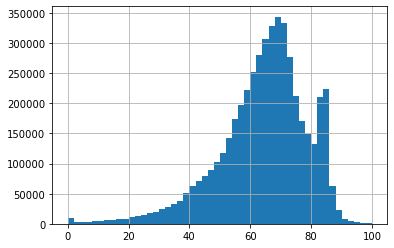

In [21]:
epc_england['CURRENT_ENERGY_EFFICIENCY'].hist(bins=50,range=(0,100))
plt.show()

In [22]:
# Shouldn't be above 100 gets capped later in the process
epc_england['CURRENT_ENERGY_EFFICIENCY'].max()

570

In [23]:
# Capping for purposes of plotting distributions
epc_capped = epc_england[epc_england.CURRENT_ENERGY_EFFICIENCY <= 100]

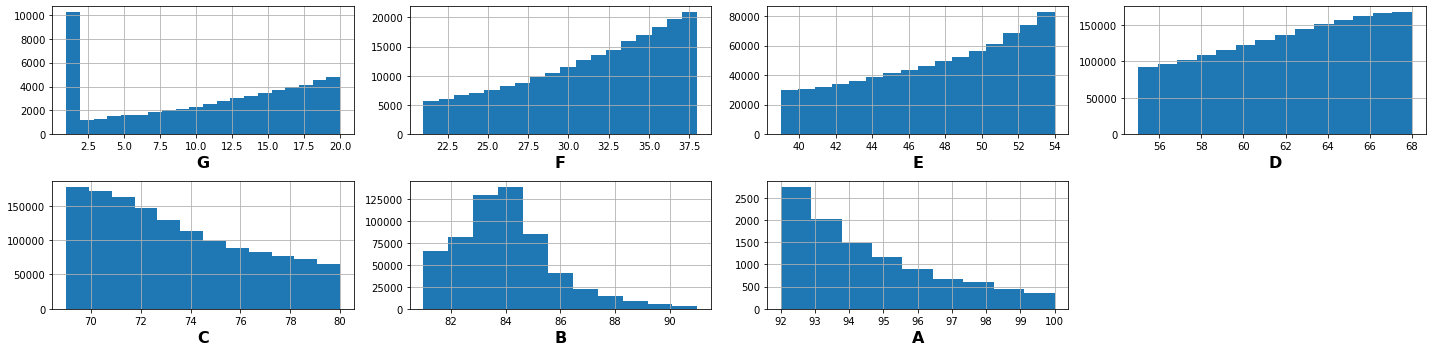

In [24]:
# plot distribution per band
plt.figure(figsize=(20,5))

epc_bands_G = epc_capped[epc_capped.CURRENT_ENERGY_RATING == 'G']
plt.subplot(241)
bins_G = len(epc_bands_G['CURRENT_ENERGY_EFFICIENCY'].unique())
epc_bands_G['CURRENT_ENERGY_EFFICIENCY'].hist(bins=bins_G)
plt.xlabel('G',fontsize=16, weight='bold')

epc_bands_F = epc_capped[epc_capped.CURRENT_ENERGY_RATING == 'F']
plt.subplot(242)
bins_F = len(epc_bands_F['CURRENT_ENERGY_EFFICIENCY'].unique())
epc_bands_F['CURRENT_ENERGY_EFFICIENCY'].hist(bins=bins_F)
plt.xlabel('F',fontsize=16, weight='bold')

epc_bands_E = epc_capped[epc_capped.CURRENT_ENERGY_RATING == 'E']
plt.subplot(243)
bins_E = len(epc_bands_E['CURRENT_ENERGY_EFFICIENCY'].unique())
epc_bands_E['CURRENT_ENERGY_EFFICIENCY'].hist(bins=bins_E)
plt.xlabel('E',fontsize=16, weight='bold')

epc_bands_D = epc_capped[epc_capped.CURRENT_ENERGY_RATING == 'D']
plt.subplot(244)
bins_D = len(epc_bands_D['CURRENT_ENERGY_EFFICIENCY'].unique())
epc_bands_D['CURRENT_ENERGY_EFFICIENCY'].hist(bins=bins_D)
plt.xlabel('D',fontsize=16, weight='bold')

epc_bands_C = epc_capped[epc_capped.CURRENT_ENERGY_RATING == 'C']
plt.subplot(245)
bins_C = len(epc_bands_C['CURRENT_ENERGY_EFFICIENCY'].unique())
epc_bands_C['CURRENT_ENERGY_EFFICIENCY'].hist(bins=bins_C)
plt.xlabel('C',fontsize=16, weight='bold')

epc_bands_B = epc_capped[epc_capped.CURRENT_ENERGY_RATING == 'B']
plt.subplot(246)
bins_B = len(epc_bands_B['CURRENT_ENERGY_EFFICIENCY'].unique())
epc_bands_B['CURRENT_ENERGY_EFFICIENCY'].hist(bins=bins_B)
plt.xlabel('B',fontsize=16, weight='bold')

epc_bands_A = epc_capped[epc_capped.CURRENT_ENERGY_RATING == 'A']
plt.subplot(247)
bins_A = len(epc_bands_A['CURRENT_ENERGY_EFFICIENCY'].unique())
epc_bands_A['CURRENT_ENERGY_EFFICIENCY'].hist(bins=bins_A)
plt.xlabel('A',fontsize=16, weight='bold')

plt.tight_layout()

### Imputing missing values

For values which do not change often over time such as BUILT_FORM (detached, terraced etc), it's safe to use the data from previous certificates where available to fill the missing values in more recent certificates.

In [25]:
len(epc_england)

4892591

In [26]:
# It's only necessary to do this for properties with more than one certificate
epc_england_grouped = epc_england.groupby(['BUILDING_REFERENCE_NUMBER'], as_index=False)['INSPECTION_DATE'].count()
epc_england_grouped_2plus = epc_england_grouped[epc_england_grouped['INSPECTION_DATE'] > 1]
epc_england_2plus = epc_england.merge(epc_england_grouped_2plus[['BUILDING_REFERENCE_NUMBER']], on = 'BUILDING_REFERENCE_NUMBER', how = 'inner')

In [27]:
# note this takes a while. This is to fill missing values for historical variables
fill_columns = ['BUILT_FORM','MAINS_GAS_FLAG','FLOOR_LEVEL','NUMBER_HABITABLE_ROOMS','FLOOR_DESCRIPTION',
                'ROOF_DESCRIPTION','HEAT_LOSS_CORRIDOR','WALLS_DESCRIPTION','FLOOR_HEIGHT']

for c in fill_columns:
    print(c)
    epc_england_2plus[c] = epc_england_2plus.groupby(['BUILDING_REFERENCE_NUMBER'], sort=False)[c].apply(lambda x: x.ffill())

BUILT_FORM
MAINS_GAS_FLAG
FLOOR_LEVEL
NUMBER_HABITABLE_ROOMS
FLOOR_DESCRIPTION
ROOF_DESCRIPTION
HEAT_LOSS_CORRIDOR
WALLS_DESCRIPTION
FLOOR_HEIGHT


In [28]:
epc_england_grouped_1 = epc_england_grouped[epc_england_grouped['INSPECTION_DATE'] == 1]
epc_england_1 = epc_england.merge(epc_england_grouped_1[['BUILDING_REFERENCE_NUMBER']], on = 'BUILDING_REFERENCE_NUMBER', how = 'inner')

In [29]:
# merging filled data for buildings with more than one certificate with data for buildings with only one certificate
epc_filled = pd.concat([epc_england_1,epc_england_2plus])

In [30]:
# checking length of filled data
len(epc_filled)

4892591

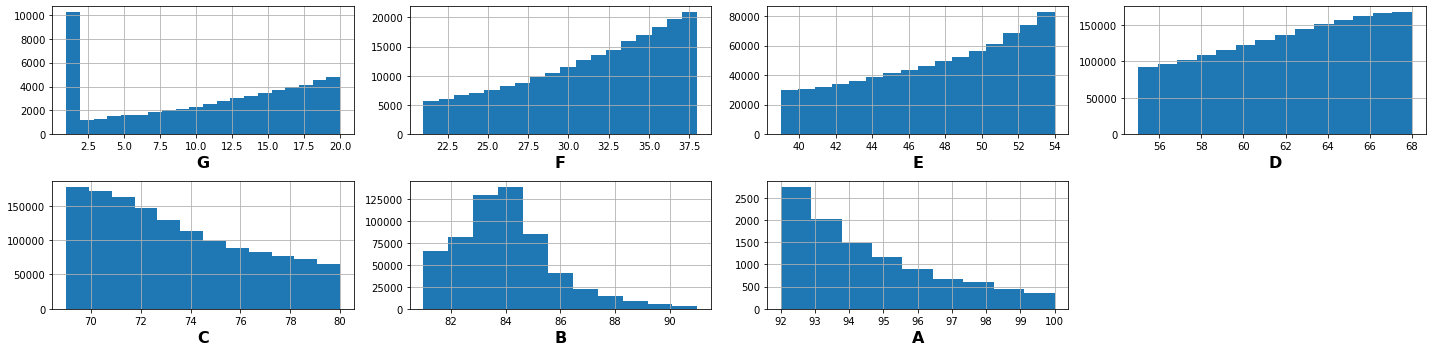

In [31]:
# plotting distribution of filled data for each band. Shouldn't have changed
epc_capped = epc_filled[epc_filled.CURRENT_ENERGY_EFFICIENCY <= 100]

# plot distribution per band
plt.figure(figsize=(20,5))

epc_bands_G = epc_capped[epc_capped.CURRENT_ENERGY_RATING == 'G']
plt.subplot(241)
bins_G = len(epc_bands_G['CURRENT_ENERGY_EFFICIENCY'].unique())
epc_bands_G['CURRENT_ENERGY_EFFICIENCY'].hist(bins=bins_G)
plt.xlabel('G',fontsize=16, weight='bold')

epc_bands_F = epc_capped[epc_capped.CURRENT_ENERGY_RATING == 'F']
plt.subplot(242)
bins_F = len(epc_bands_F['CURRENT_ENERGY_EFFICIENCY'].unique())
epc_bands_F['CURRENT_ENERGY_EFFICIENCY'].hist(bins=bins_F)
plt.xlabel('F',fontsize=16, weight='bold')

epc_bands_E = epc_capped[epc_capped.CURRENT_ENERGY_RATING == 'E']
plt.subplot(243)
bins_E = len(epc_bands_E['CURRENT_ENERGY_EFFICIENCY'].unique())
epc_bands_E['CURRENT_ENERGY_EFFICIENCY'].hist(bins=bins_E)
plt.xlabel('E',fontsize=16, weight='bold')

epc_bands_D = epc_capped[epc_capped.CURRENT_ENERGY_RATING == 'D']
plt.subplot(244)
bins_D = len(epc_bands_D['CURRENT_ENERGY_EFFICIENCY'].unique())
epc_bands_D['CURRENT_ENERGY_EFFICIENCY'].hist(bins=bins_D)
plt.xlabel('D',fontsize=16, weight='bold')

epc_bands_C = epc_capped[epc_capped.CURRENT_ENERGY_RATING == 'C']
plt.subplot(245)
bins_C = len(epc_bands_C['CURRENT_ENERGY_EFFICIENCY'].unique())
epc_bands_C['CURRENT_ENERGY_EFFICIENCY'].hist(bins=bins_C)
plt.xlabel('C',fontsize=16, weight='bold')

epc_bands_B = epc_capped[epc_capped.CURRENT_ENERGY_RATING == 'B']
plt.subplot(246)
bins_B = len(epc_bands_B['CURRENT_ENERGY_EFFICIENCY'].unique())
epc_bands_B['CURRENT_ENERGY_EFFICIENCY'].hist(bins=bins_B)
plt.xlabel('B',fontsize=16, weight='bold')

epc_bands_A = epc_capped[epc_capped.CURRENT_ENERGY_RATING == 'A']
plt.subplot(247)
bins_A = len(epc_bands_A['CURRENT_ENERGY_EFFICIENCY'].unique())
epc_bands_A['CURRENT_ENERGY_EFFICIENCY'].hist(bins=bins_A)
plt.xlabel('A',fontsize=16, weight='bold')

plt.tight_layout()

### Deduping by taking latest record

Some properties have multiple EPC, we only want to keep one per inspection data

In [32]:
len(epc_filled[epc_filled.duplicated(subset=['BUILDING_REFERENCE_NUMBER','INSPECTION_DATE'])])

58604

In [33]:
# First take just the latest lodegment date
epc_filled.sort_values(by = ['BUILDING_REFERENCE_NUMBER','INSPECTION_DATE','LODGEMENT_DATE'],inplace=True)
epc_filled.drop_duplicates(subset=(['BUILDING_REFERENCE_NUMBER','INSPECTION_DATE']),keep='last',inplace=True)

In [34]:
len(epc_filled[epc_filled.duplicated(subset=['BUILDING_REFERENCE_NUMBER','INSPECTION_DATE'])])

0

### Split in to train and test - 80% split

Splitting the train and test data before any further manipulation

epc_filled = shuffle(epc_filled)
epc_filled.reset_index(drop=True)
epc_train, epc_test = train_test_split(epc_filled, test_size = 0.2, random_state = 1234)

In [35]:
epc_filled1 = shuffle(epc_filled)
epc_filled1.reset_index(drop=True)
epc_train, epc_test = train_test_split(epc_filled1, test_size = 0.2, random_state = 1234)

In [36]:
#Check the distribution of the categorical target
print(epc_filled['CURRENT_ENERGY_RATING'].value_counts(normalize = True))
print(epc_filled1['CURRENT_ENERGY_RATING'].value_counts(normalize = True))
print(epc_train['CURRENT_ENERGY_RATING'].value_counts(normalize = True))
print(epc_test['CURRENT_ENERGY_RATING'].value_counts(normalize = True))

#Check the stats of the numerc target
print(epc_filled['CURRENT_ENERGY_EFFICIENCY'].describe())
print(epc_filled1['CURRENT_ENERGY_EFFICIENCY'].describe())
print(epc_train['CURRENT_ENERGY_EFFICIENCY'].describe())
print(epc_test['CURRENT_ENERGY_EFFICIENCY'].describe())

D           0.377526
C           0.283998
E           0.158019
B           0.122283
F           0.043254
G           0.012448
A           0.002464
INVALID!    0.000008
Name: CURRENT_ENERGY_RATING, dtype: float64
D           0.377526
C           0.283998
E           0.158019
B           0.122283
F           0.043254
G           0.012448
A           0.002464
INVALID!    0.000008
Name: CURRENT_ENERGY_RATING, dtype: float64
D           0.377575
C           0.283936
E           0.158027
B           0.122295
F           0.043267
G           0.012443
A           0.002451
INVALID!    0.000006
Name: CURRENT_ENERGY_RATING, dtype: float64
D           0.377329
C           0.284249
E           0.157985
B           0.122236
F           0.043198
G           0.012469
A           0.002519
INVALID!    0.000014
Name: CURRENT_ENERGY_RATING, dtype: float64
count    4.833987e+06
mean     6.391338e+01
std      1.456515e+01
min      0.000000e+00
25%      5.600000e+01
50%      6.600000e+01
75%      7.300000e+0

In [37]:
len(epc_train[epc_train.isnull()])

3867189

### Clean up

In [38]:
epc_filled.reset_index(drop=True)

,LMK_KEY,region,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,PROPERTY_TYPE,BUILT_FORM,INSPECTION_DATE,LODGEMENT_DATE,...,MAINHEATC_ENV_EFF,LIGHTING_DESCRIPTION,LIGHTING_ENERGY_EFF,LIGHTING_ENV_EFF,MAIN_FUEL,HEAT_LOSS_CORRIDOR,UNHEATED_CORRIDOR_LENGTH,FLOOR_HEIGHT,SOLAR_WATER_HEATING_FLAG,MECHANICAL_VENTILATION
0,474209002014072615194700042152,Exeter,EX2 9EJ,2,D,61,House,Mid-Terrace,2014-07-25,2014-07-26,...,Good,Low energy lighting in 75% of fixed outlets,Very Good,Very Good,mains gas (not community),NO DATA!,NaN,NaN,NaN,natural
1,474609002017022017183502032206,Broxtowe,NG9 3AF,6,C,73,House,Detached,2017-02-20,2017-02-20,...,Good,Low energy lighting in 93% of fixed outlets,Very Good,Very Good,mains gas (not community),NO DATA!,NaN,NaN,N,natural
2,362000002008122009245906089418,Teignbridge,EX6 7SJ,8,D,66,House,Detached,2008-12-19,2008-12-20,...,Average,Low energy lighting in all fixed outlets,Very Good,Very Good,oil - this is for backwards compatibility only...,NO DATA!,NaN,2.60,N,natural
3,362002042020080320250702007808,Teignbridge,EX6 7SJ,8,D,60,House,Detached,2020-07-30,2020-08-03,...,Good,Low energy lighting in all fixed outlets,Very Good,Very Good,oil (not community),NO DATA!,NaN,2.60,N,natural
4,370009262011112416424900548409,Dartford,DA1 5JF,18,C,76,Flat,NO DATA!,2011-11-24,2011-11-24,...,Good,Low energy lighting in all fixed outlets,Very Good,Very Good,mains gas (not community),no corridor,NaN,2.40,NaN,natural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4833982,1bbcffde2e67db588adb581caab791af5eae973e6a06b3...,Waverley,GU8 4PA,10003359072,E,52,House,Semi-Detached,2022-09-23,2022-09-23,...,Very Good,Low energy lighting in 71% of fixed outlets,Very Good,Very Good,oil (not community),NaN,NaN,2.05,N,natural
4833983,911fea13b9ec8817b63a98592daeadd0fe277609ba5835...,Broxbourne,EN10 7BG,10003359073,C,73,House,Semi-Detached,2022-08-29,2022-08-30,...,Average,Low energy lighting in all fixed outlets,Very Good,Very Good,mains gas (not community),NaN,NaN,2.41,N,natural
4833984,94045a45fb9fc5095bec76b7f4f09d264573973402d779...,Babergh,IP8 3PP,10003359076,B,83,Bungalow,Detached,2022-08-18,2022-08-18,...,Very Good,Low energy lighting in all fixed outlets,Very Good,Very Good,Gas: bulk LPG,NaN,NaN,2.82,NaN,NaN
4833985,3a1a8dd8dcced5bcc2760c03effee782d3f6c375fd57a5...,Ashfield,NG17 2DR,827095600001,C,70,Bungalow,Detached,2022-02-11,2022-02-13,...,Good,Low energy lighting in all fixed outlets,Very Good,Very Good,mains gas (not community),NaN,NaN,2.35,N,natural


In [39]:
# replace 'NO DATA!', 'not defined', 'not recored' and INVALID! with null
epc_filled_cleaned = epc_filled.replace('INVALID!',np.nan)
epc_filled_cleaned = epc_filled.replace(['NO DATA!','NODATA!'],np.nan)
epc_filled_cleaned = epc_filled.replace(['not recorded','not defined','unknown','Unknown','Not defined','Not recorded'],np.nan)
epc_filled_cleaned = epc_filled.replace(['N/A','n/a'],np.nan)
# replace any values starting sap as these are the column headers not real data
epc_filled_cleaned = epc_filled.replace([r'^SAP.*',r'^sap.*'],np.nan,regex=True)
# replace '+ Chr(13) +' as it's meaningless
epc_filled_cleaned = epc_filled.replace([r"\+ Chr\(13\) \+",r"\+ chr\(13\) \+"],'+', regex=True)
epc_filled_cleaned = epc_filled.replace([r"\+ Chr\(13\) \+",r"\+ chr\(13\) \+"],'+', regex=True)

In [40]:
epc_filled1.reset_index(drop=True)# replace 'NO DATA!', 'not defined', 'not recored' and INVALID! with null
epc_train = epc_train.replace('INVALID!',np.nan)
epc_train = epc_train.replace(['NO DATA!','NODATA!'],np.nan)
epc_train = epc_train.replace(['not recorded','not defined','unknown','Unknown','Not defined','Not recorded'],np.nan)
epc_train = epc_train.replace(['N/A','n/a'],np.nan)
# replace any values starting sap as these are the column headers not real data
epc_train = epc_train.replace([r'^SAP.*',r'^sap.*'],np.nan,regex=True)
# replace '+ Chr(13) +' as it's meaningless
epc_train = epc_train.replace([r"\+ Chr\(13\) \+",r"\+ chr\(13\) \+"],'+', regex=True)
epc_train = epc_train.replace([r"\+ Chr\(13\) \+",r"\+ chr\(13\) \+"],'+', regex=True)

In [41]:
# replace 'NO DATA!', 'not defined' and 'not recored' and INVALID! with null
epc_test = epc_test.replace('INVALID!',np.nan)
epc_test = epc_test.replace(['NO DATA!','NODATA!'],np.nan)
epc_test = epc_test.replace(['not recorded','not defined','unknown','Unknown','Not defined','Not recorded'],np.nan)
epc_test = epc_test.replace(['N/A','n/a'],np.nan)
# replace any values starting sap as these are the column headers not real data
epc_test = epc_test.replace([r'^SAP.*',r'^sap.*'],np.nan,regex=True)
# replace '+ Chr(13) +' as it's meaningless
epc_test = epc_test.replace([r"\+ Chr\(13\) \+",r"\+ chr\(13\) \+"],'+', regex=True)

In [42]:
# replacing values in columns which are actually just the column header
replacement_dict = {'HOTWATER_DESCRIPTION':{r'^Hot-Water$':np.nan},'FLOOR_DESCRIPTION':{r'^Floor$':np.nan},
'WALLS_DESCRIPTION':{r'^Wall$':np.nan},'WINDOWS_DESCRIPTION':{r'^Window$':np.nan},'ROOF_DESCRIPTION':{r'^Roof$':np.nan},
'MAIN_HEATING_CONTROLS':{r'^Main-Heating-Controls$':np.nan},'SECONDHEAT_DESCRIPTION':{r'^Secondary-Heating$':np.nan},
'LIGHTING_DESCRIPTION':{r'^Lighting$':np.nan},'MAINHEATCONT_DESCRIPTION':{r'^Main-Heating-Controls$':np.nan},
'CURRENT_ENERGY_RATING':{r'^INVALID!':np.nan}}

epc_filled_cleaned.replace(replacement_dict,regex=True)
epc_train = epc_train.replace(replacement_dict,regex=True)
epc_test = epc_test.replace(replacement_dict,regex=True)

### Export Data

In [43]:
epc_train.to_csv(os.path.join(processing_path,epc_train_fname) + epc_fname_suffix,index = False)
epc_test.to_csv(os.path.join(processing_path,epc_test_fname) + epc_fname_suffix,index = False)
epc_filled_cleaned.to_csv(os.path.join(processing_path,epc_england_fname) + epc_fname_suffix, index=False)

In [35]:
epc_england_2 = epc_filled_cleaned[(epc_filled_cleaned.index >= "2022-01-01") & (epc_filled_cleaned.index < "2022-12-31")]
epc_england_2.head()